In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("Breast_cancer_data.csv")

In [12]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [13]:
data.shape 

(569, 6)

In [14]:
print(data.isnull().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [15]:
X =  data.drop("diagnosis", axis = 1)
Y = data["diagnosis"]

In [16]:
X.shape

(569, 5)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# X_train, Y_train, X_test, Y_test = train_test_split(X,Y, test_size = 0.4,random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42) # stratify  function 

In [19]:
from sklearn.neighbors import  KNeighborsClassifier


In [20]:
neighbors_values = np.arange(1,20)
train_accuracy =np.empty(len(neighbors_values))
test_accuracy = np.empty(len(neighbors_values))# create an array without initializing the entries of given shape and type.

In [21]:
for i, k in enumerate(neighbors_values):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  train_accuracy[i] = knn.score(X_train, Y_train) #score function in classifier calculates accuracy
  test_accuracy[i] = knn.score(X_test,Y_test)


In [22]:
print(train_accuracy)
print( test_accuracy)

[1.         0.91788856 0.91495601 0.91495601 0.90615836 0.89442815
 0.86803519 0.86217009 0.86803519 0.85043988 0.85923754 0.86510264
 0.87390029 0.87096774 0.87390029 0.86803519 0.87096774 0.86803519
 0.86803519]
[0.86403509 0.87280702 0.90350877 0.88596491 0.9122807  0.89912281
 0.92105263 0.90350877 0.92105263 0.89473684 0.9254386  0.90789474
 0.92105263 0.9122807  0.92105263 0.90350877 0.91666667 0.90789474
 0.92105263]


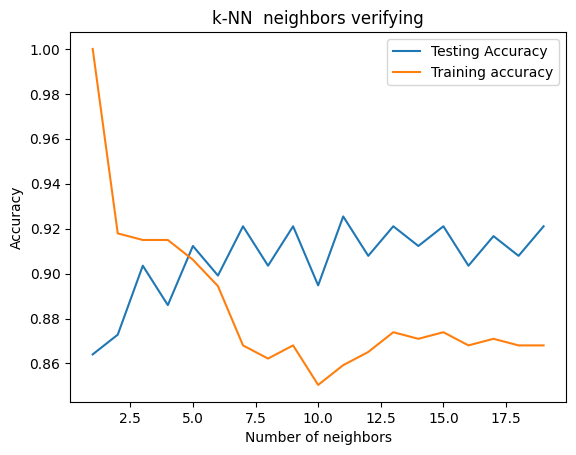

In [23]:
plt.title('k-NN  neighbors verifying')
plt.plot(neighbors_values, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors_values, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# testing accuracy maximum at 10,so take aneighbor value 10

In [25]:
knn = KNeighborsClassifier(n_neighbors=10)

In [26]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
knn.score(X_test,Y_test)


0.8947368421052632

In [28]:
knn.score(X_train,Y_train)

0.8504398826979472

In [29]:
y_prediction = knn.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(Y_test, y_prediction)

array([[ 67,  13],
       [ 11, 137]])

In [ ]:
# True Positive= 182, True Negative = 45, false Positive = 24, False Negative = 57